# Homework 6: A Systematic Homework on Randomness

Physics 177, Spring 2017 (Prof. Tanedo)  
(Problem 1b Revised May 23)  
Revised: Monday, May 15th  
Due: Tuesday, May 23    

Felix Marcia


## Problem 1: Drunkard's Walk in One Dimension
This problem is motivated by Chapter 7 of *Computational Physics, Second Edition* by N. Giordano and H. Nakanishi.


*Insert your favorite joke about the Thursday night wine and music events.*

The drunkard's walk problem is an example of a **stochastic** system (randomness plays a key role). A drunkard walks randomly in one dimension, as defined by the following rule:

* At each time step, the drunkard randomly picks a direction (forward or backward) and takes one step in that direction.

In this problem, will use Python's `random` library to code the drunkard's walk in an array. You then relate this problem to diffusion in a physical system.

### Problem 1a

Code the drunkard's walk for `nSteps=1000` steps. Assume the drunkard starts at the original The result of your code should be an array of positions. It is also useful to keep an array of squared positions, $x^2$. 

Plot the drunkard's walk ($x$ as a function of step number) and the squared displacement ($x^2$ as a function of step number) for a given random seed.

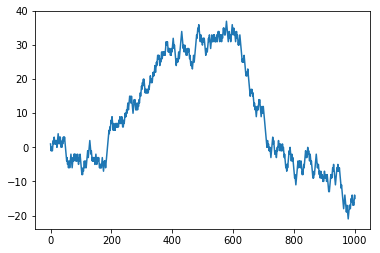

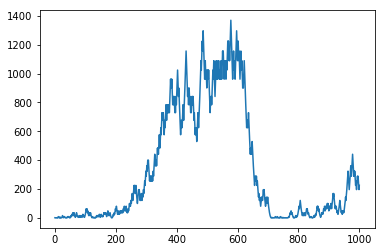

In [1]:
from random import*
import matplotlib.pyplot as plt
import numpy as np

nstep = 1000
pos = 0
possquared = pos**2
randint(1,2)
i = 0

nsteparray = []
posarray = []
possquaredarray = []

while i <= nstep:
    j = randint(1,2)
    if(j == 1):
        pos = pos - 1
    if(j == 2):
        pos = pos + 1
    possquared = pos**2
    nsteparray.append(i)
    posarray.append(pos)
    possquaredarray.append(possquared)
    i = i + 1 

x = np.array(nsteparray)
y1 = np.array(posarray)
y2 = np.array(possquaredarray)

plt.plot(x,y1)
plt.show()
plt.plot(x,y2)
plt.show()
    

### Problem 1b (revised Tuesday, May 23)

**This question has been revised for clarity.**

A useful quantity is the *average* of $x^2$ over all previous steps in the drunkard's walk. Call this $\langle x^2 \rangle_i$. For example, for the fifth step,  

$\langle x^2 \rangle_5 = \frac{1}{5}\left(x_1^2 + x_2^2 + x_3^2 + x_4^2 + x_5^2\right)$.  

However, an even *more* useful quantity is the average of $\langle x^2 \rangle_i$ over an ensemble of many drunkards. For example, if we had three drunkards (Alice, Bob, and Charlie), then this quantity, $\langle \langle x^2 \rangle_i \rangle$, is

$\langle \langle x^2 \rangle_i \rangle = \frac{1}{3}\left( \langle x^2 \rangle_i^A + \langle x^2 \rangle_i^B + \langle x^2 \rangle_i^C \right)$.  

For our purposes, pick `nWalkers=100`. This means that you will simulate `nWalkers` different random walks. The "average of $\langle x^2\rangle$ over walkers" gives an array of length `nSteps` where each element is an average of $\langle x^2 \rangle_i$ over the `nWalker` drunkards. 

Your code should output:  

$\langle \langle x^2 \rangle_i\rangle = \frac{1}{n_\text{Walkers}} \sum_{a} \langle x^2\rangle_i^a$  ,
where $a$ runs over the different drunkards.

The resulting plot as a function of step number should look much better behaved. In fact, it should fit to

$\langle \langle x^2 \rangle_i\rangle = 2 D t_i$,

where $D$ is the diffusion constant. That is: this plot should be linear in step number. What is the value of $D$ based on your plot?

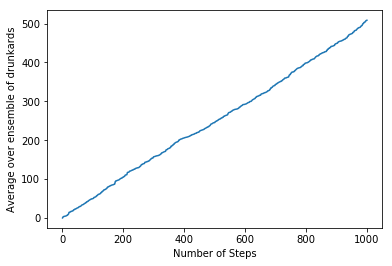

In [2]:
step = 1000
numpeople = 1000
totalperstep = 0
totalperperson = 0
pos = 0
possquared = 0
totalaverageforoneperson = 0
overallaverage = 0
i = 1
l = 1
k = 1
overallaveragearray = []
nsteparray = []

while k <= step:
    nsteparray.append(k)
    k = k + 1
    
    

while l <= numpeople:
    
    i = 1
    
    pos = 0
    
    totalperperson = 0
    
    while i <= step:
        
        j = randint(1,2)
        if(j == 1):
            pos = pos - 1
        if(j == 2):
            pos = pos + 1
            
        possquared = pos**2
        
        i = i + 1
        
        totalperstep = possquared
        
        totalperperson = totalperperson + totalperstep/step
        
    overallaverage = overallaverage + totalperperson/numpeople
    
    overallaveragearray.append(overallaverage)
    
    l = l + 1

x = np.array(nsteparray)
y = np.array(overallaveragearray)

plt.plot(x, y)
plt.xlabel("Number of Steps")
plt.ylabel("Average over ensemble of drunkards")
plt.show()





The slope is approximately 1/2. We know (or at least the professor knows) that the slope is equal to 2*D. Thus the value for D is 1/4.

### Problem 1c

Do the same thing for a drunkard's walk in three dimensions. Define the position of the particle to be a `numpy` array with three components. It may be helpful to define `numpy` arrays with the possible directions one can traverse.

Store these directions in a list, `directions`.  A random step then corresponds to a shift by `sample(directions,1)[0]`. (Test this.)

What is the value of $D$ for the 3D drunkard's walk?

In [3]:
initialposition = [[0,0,0]]
initialposition.append([0,0,1])
print(initialposition)

[[0, 0, 0], [0, 0, 1]]


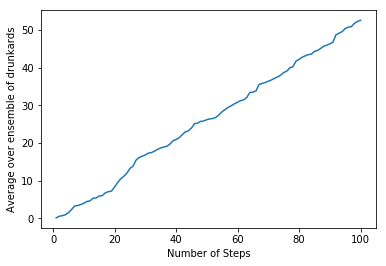

In [4]:
nsteps = 100
numpeople = 100
displacementsquared = 0 
totalperperson = 0
positionvector = [0,0,0]
displacementsquaredarray = []
averages_of_averages = []
averagesOfaverages = 0

i = 1
l = 1
k = 1

nsteparray = []

while k <= nsteps:
    nsteparray.append(k)
    k = k + 1
    
def displacementsquared_function(vector):
    xsquared = vector[0]**2
    ysquared = vector[1]**2
    zsquared = vector[2]**2
    return xsquared + ysquared + zsquared

def totalperperson_function(array):
    total = 0
    u = 0
    lengthofarray = len(array)
    while u < lengthofarray:
        total = total + array[u]
        u += 1
    return total
    
while l <= numpeople:
    
    i = 1
    
    positionvector = [0,0,0]
    
    displacementsquaredarray = []
    
    totalperperson = 0
    
    while i <= nsteps:
        
        j = randint(0,5)
        
        if j == 0:
            positionvector[0] = positionvector[0] - 1
        if j == 1:
            positionvector[0] = positionvector[0] + 1
        if j == 2:
            positionvector[1] = positionvector[1] - 1
        if j == 3:
            positionvector[1] = positionvector[1] + 1
        if j == 4:
            positionvector[2] = positionvector[2] - 1
        if j == 5:
            positionvector[2] = positionvector[2] + 1
            
        displacementsquared = displacementsquared_function(positionvector)
        
        displacementsquaredarray.append(displacementsquared/nsteps)
        
        i += 1
        
    totalperperson = totalperperson_function(displacementsquaredarray)
    
    averagesOfaverages = averagesOfaverages + totalperperson
    
    averages_of_averages.append(averagesOfaverages/numpeople)
    
    l += 1

x1 = np.array(nsteparray)
y1 = np.array(averages_of_averages)

plt.plot(x1, y1)
plt.xlabel("Number of Steps")
plt.ylabel("Average over ensemble of drunkards")
plt.show()

We find that the value for D is once again 1/4 (However, the expected value was 1/12, since the number of dimensions tripled).

### Problem 1.x (extra credit)

*This problem has no programming, I suggest working it out on paper and then sketching the proof here, with key steps written out explicitly*

Derive the diffusion equation from the discretized drunkard's walk. For simplicity, work in two dimensions. Let $P(i,j,t)$ be the probability of finding the drunkard at site $(i,j)$ and time $t$. You want to show:

$\displaystyle \frac{\partial P(x,y,t)}{\partial t} = D \nabla^2 P(x,y,t)$

The key to this is the insight that the probability that the drunkard is at position $(i,j)$ at time $t$ is given by the equally weighted average of the probabilities that the drunkard was at one of the adjacent positions. 

Use this insight to re-write $P(i,j,t) - P(i,j,t-1)$ as a sum of terms that reproduces the Laplacian. You remember what the discretized Laplacian looks like, right?

## Problem 2: Brownian Motion

Let's use the 2D drunkard's walk to model Brownian motion. 

### Problem 2a

Imagine a 2D box of length `L=101`. Place a "drunkard" in the middle of the grid. The drunkard moves in one step in any direction (north, east, south, west) each step. If the drunk hits the wall, forbit motion that goes outside of the box. 

Animate the position of the drunkard as a funtion of time for some period of time.

### Problem 2b

Same as problem 2a, but now populate the center of the box with 20 drunkards that each move randomly. For this problem, allow the drunkards to "stack" on top of each other if they overlap.

### Problem 2x (extra credit)

Semi-self-avoiding drunkards. Same as problem 2b, but now prohibit any motion that would cause drunkards to overlap with each other. You'll have to come up with some appropriate initial condition where the drunkards all start close to each other in the center of the box. There may be conditions where a drunkard cannot move.

# Problem 2a

In [17]:
import numpy as np
number_of_people = 1                 #number of people
number_of_steps  = 200                #number of steps
i = 1                                #loop holder for number of steps
l = 1                                #loop holder for number of people
L = 5                                #length of side of box
grid = np.zeros([L,L],int)           #box in 2D
gridBeforemove = np.zeros([L,L],int) #box to be modified
grid[(L-1)/2,(L-1)/2] = 1            #initial position of drunkard
xPosition = 0                        #x position of drunkard
yPosition = 0                        #y position of drunkard

def currentpositionofdrunkard_function(grid1):
    q = 0 #x axis of grid
    w = 0 #y axis of grid
    while q <= L - 1:
        w = 0
        while w <= L - 1 :
            if grid1[w , q] == 1:
                return w , q 
            w += 1
        q += 1
        
def funnyaddition_function(grid2 , n):
    #print(currentpositionofdrunkard_function(grid))
    xPosition = currentpositionofdrunkard_function(grid2)[1]
    yPosition = currentpositionofdrunkard_function(grid2)[0]
    
    yPositiontoDown = yPosition - 1
    yPositiontoUp = yPosition + 1
    xPositiontoLeft = xPosition - 1
    xPositiontoRight = xPosition + 1
    
    if n == 0:
        return yPositiontoDown , xPosition
    if n == 1:
        return yPositiontoUp , xPosition
    if n == 2:
        return yPosition , xPositiontoRight
    if n == 3:
        print(xPosition)
        print(xPositiontoLeft)
        return yPosition , xPositiontoLeft

xPosition = currentpositionofdrunkard_function(grid)[0]
yPosition = currentpositionofdrunkard_function(grid)[1]

while l <= number_of_people:
    
    i = 1
    
    while i <= number_of_steps:
        
        gridBeforemove = grid
        
        print("Current Position Before Move:")
        print(currentpositionofdrunkard_function(gridBeforemove))
        
        coordinates = currentpositionofdrunkard_function(gridBeforemove)
        
        print("Grid Before Move:")
        print(gridBeforemove)
        
        j = randint(0,3)
        
        print("Print J:", j)
        
        while (j == 0 and coordinates[1] == 0):
            j = randint(0,3)
        while (j == 1 and coordinates[0] == L - 1):
            j = randint(0,3)
        while (j == 2 and coordinates[1] == L - 1):
            j = randint(0,3)
        while (j == 3 and coordinates[0] == 0):
            j = randint(0,3)
        
        if j == 0:          #moves drunkard up
            grid[coordinates[0] + 1, coordinates[1]] = 1
            grid[currentpositionofdrunkard_function(gridBeforemove)] = 0
        if j == 1:          #moves drunkard down
            grid[coordinates[0] + 1, coordinates[1]] = 1
            grid[currentpositionofdrunkard_function(gridBeforemove)] = 0
        if j == 2:          #moves drunkard right
            grid[coordinates[0], coordinates[1] + 1] = 1
            grid[currentpositionofdrunkard_function(gridBeforemove)] = 0
        if j == 3:          #moves drunkard left
            grid[coordinates[0], coordinates[1] + 1] = 1
            grid[currentpositionofdrunkard_function(gridBeforemove)] = 0
        
        print("Grid After Move:")
        print(grid)
        
        i += 1
    print("Done With Person:", l)
    l += 1


Current Position Before Move:
(2, 2)
Grid Before Move:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Print J: 0
Grid After Move:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]
Current Position Before Move:
(3, 2)
Grid Before Move:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]
Print J: 3
Grid After Move:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]]
Current Position Before Move:
(3, 3)
Grid Before Move:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]]
Print J: 0
Grid After Move:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]]
Current Position Before Move:
(4, 3)
Grid Before Move:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]]
Print J: 0


/Users/FelixMarcia/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


IndexError: index 5 is out of bounds for axis 0 with size 5

## Problem 3: Hyperspheres and Monte Carlo

Calculate the volume of a unit $n$-sphere for the cases $n$ = 2,3,4,5,6. Use the **Monte Carlo** "throwing marbles" method where you randomly sample points in an $n$-dimensional unit cube and keep track of how many points fall within the condition

$\sum_i^n x_i^2 < 1$.

Compare to the analytic formulae here: https://en.wikipedia.org/wiki/Volume_of_an_n-ball

### Problem 3x

Plot the estimated hypervolume as a function of number of random samples used, and plot (as a horizontal line) the correct values from the analytic formula. Alternatively, plot the "difference from the true result" as a function of number of samples. 

Comment on how the number of samples required depends on the dimensionality of the hypersphere.

In [18]:
def PiEstimate(nSample):
    count = 0
    for i in range(nSample):
        x=random()
        y=random()
        if x**2 + y**2 <=1:
            count +=1
    return 4*count/nSample

In [22]:
N=10000
PiEstimate(N*1000)

3.1414476

In [23]:
def PiEstimate_3DSphere(nSample):
    count = 0
    for i in range(nSample):
        x = random()
        y = random()
        z = random()
        if x**2 + y**2 + z**2 <= 1:
            count +=1
    return (24/4)*count/nSample

In [25]:
PiEstimate_3DSphere(N*100)

3.142434

In [28]:
def PiEstimate_4DSphere(nSample):
    count = 0
    for i in range(nSample):
        x = random()
        y = random()
        z = random()
        t = random()
        if x**2 + y**2 + z**2 + t**2 <= 1:
            count +=1
    return (32*count/nSample)**.5

In [29]:
PiEstimate_4DSphere(N)

3.1435012327021603

In [30]:
def PiEstimate_5DSphere(nSample):
    count = 0
    for i in range(nSample):
        x = random()
        y = random()
        z = random()
        t = random()
        u = random()
        if x**2 + y**2 + z**2 + t**2 + u**2 <= 1:
            count +=1
    return (60*count/nSample)**.5

In [32]:
PiEstimate_5DSphere(N*100)

3.1444522575482043

In [36]:
def PiEstimate_6DSphere(nSample):
    count = 0
    for i in range(nSample):
        x = random()
        y = random()
        z = random()
        t = random()
        u = random()
        v = random()
        if x**2 + y**2 + z**2 + t**2 + u**2 + z**2 <= 1:
            count +=1
    return (64*6*count/nSample)**(1/3)

In [48]:
PiEstimate_6DSphere(N)

3.5570197673112065